このノートブックは、これまでの方法で Google Colaboratory に rstan をインストールできない状態（7/11現在）のための非常用です。下のセルを実行すると rstan がインストールされますが、非常に時間がかかります（約15分）！！

In [ ]:
#rstanがインストールされていないならインストールする
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter3.5")
    system("add-apt-repository -y ppa:marutter/c2d4u3.5") 
    system("apt-get update")
    system("apt-get install -y libv8-dev")
    install.packages("V8")
    install.packages("rstan")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘loo’, ‘RcppEigen’




# インチキコイン問題

In [ ]:
library(rstan)
x <- c(1,1,1,1,1,1,0,0,1,1)

# bernoulli.stan
stancode <- '
data {
  int n;
  int x[n];
}

parameters {
  real<lower=0,upper=1> p;
}

model {
  x ~ bernoulli(p);
}
'
fit <- stan(model_code = stancode,
            data=list(n=10,x=x),
            iter=21000,warmup=1000,chains=5)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.1, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)




SAMPLING FOR MODEL '40a62a85a1938c28a16209fad4ed7a30' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 21000 [  0%]  (Warmup)
Chain 1: Iteration:  1001 / 21000 [  4%]  (Sampling)
Chain 1: Iteration:  3100 / 21000 [ 14%]  (Sampling)
Chain 1: Iteration:  5200 / 21000 [ 24%]  (Sampling)
Chain 1: Iteration:  7300 / 21000 [ 34%]  (Sampling)
Chain 1: Iteration:  9400 / 21000 [ 44%]  (Sampling)
Chain 1: Iteration: 11500 / 21000 [ 54%]  (Sampling)
Chain 1: Iteration: 13600 / 21000 [ 64%]  (Sampling)
Chain 1: Iteration: 15700 / 21000 [ 74%]  (Sampling)
Chain 1: Iteration: 17800 / 21000 [ 84%]  (Sampling)
Chain 1: Iteration: 19900 / 21000 [ 94%]  (Sampling)
Chain 1: Iteration: 21000 / 21000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.007558 seconds (Warm-up)
Chain 1:          

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



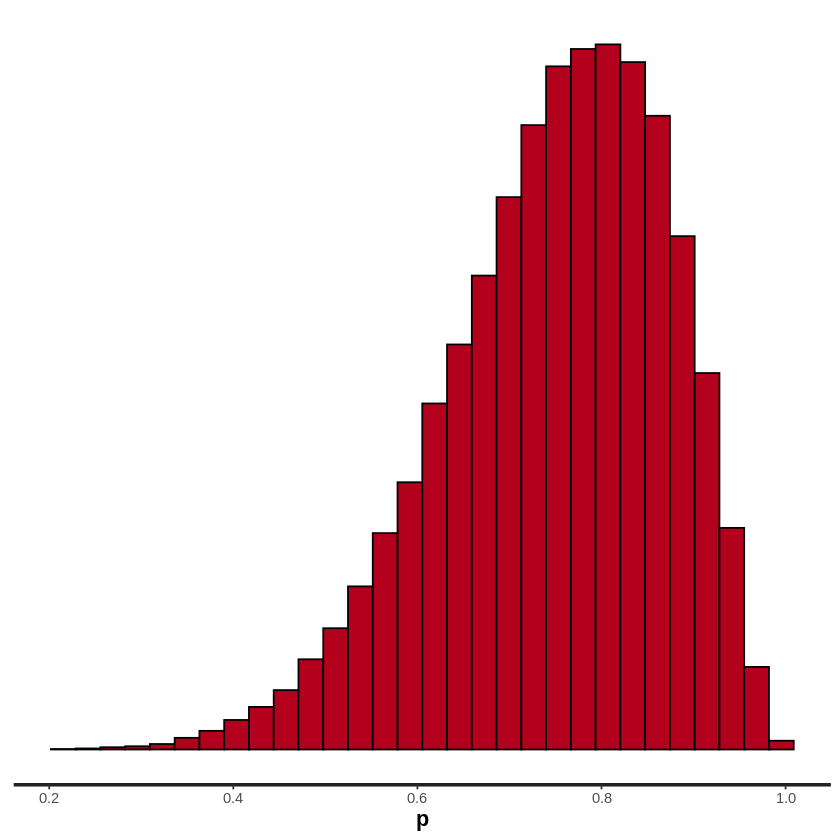

In [ ]:
stan_hist(fit)

In [ ]:
print(fit,probs=c(0.025,0.05,0.95,0.975),digits=3)

Inference for Stan model: 40a62a85a1938c28a16209fad4ed7a30.
5 chains, each with iter=21000; warmup=1000; thin=1; 
post-warmup draws per chain=20000, total post-warmup draws=1e+05.

       mean se_mean    sd   2.5%     5%    95%  97.5% n_eff Rhat
p     0.749   0.001 0.121  0.481  0.527  0.921  0.939 33317    1
lp__ -7.281   0.004 0.757 -9.416 -8.794 -6.750 -6.749 37708    1

Samples were drawn using NUTS(diag_e) at Sat Jul 11 02:53:27 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


# 二項分布

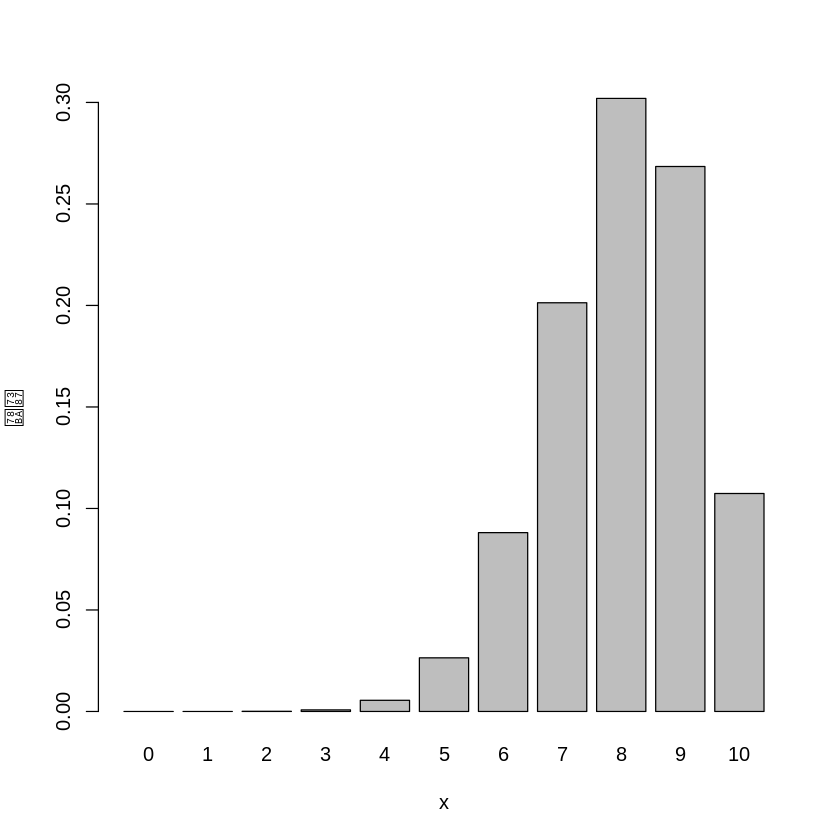

In [ ]:
n <- 10
x <- dbinom(0:n,n,0.8)
barplot(x,names.arg=0:10,xlab="x",ylab="確率")

# 蕎麦の選好問題

In [ ]:
# binomial.stan
stancode <- '
data {
  int x;
  int n;
}

parameters {
  real<lower=0,upper=1> p;
}

model {
  p ~ uniform(0,1);
  
  x ~ binomial(n,p);
}

generated quantities {
  real Odds;
  real u_p_gt_05;
  real u_Odds_gt_14;
  
  Odds = p / (1 - p); // 式(6.22)
  u_p_gt_05 = p > 0.5; // 式(6.23)
  u_Odds_gt_14 = Odds > 1.4; // 式(6.24)
}
'
fit <- stan(model_code = stancode,
            data=list(x=220,n=400),
            iter=21000,warmup=1000,chains=5)
print(fit,probs=c(0.025,0.05,0.95,0.975),digits=3)

recompiling to avoid crashing R session




SAMPLING FOR MODEL '75976d3a71cf456b890e58343e483969' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 21000 [  0%]  (Warmup)
Chain 1: Iteration:  1001 / 21000 [  4%]  (Sampling)
Chain 1: Iteration:  3100 / 21000 [ 14%]  (Sampling)
Chain 1: Iteration:  5200 / 21000 [ 24%]  (Sampling)
Chain 1: Iteration:  7300 / 21000 [ 34%]  (Sampling)
Chain 1: Iteration:  9400 / 21000 [ 44%]  (Sampling)
Chain 1: Iteration: 11500 / 21000 [ 54%]  (Sampling)
Chain 1: Iteration: 13600 / 21000 [ 64%]  (Sampling)
Chain 1: Iteration: 15700 / 21000 [ 74%]  (Sampling)
Chain 1: Iteration: 17800 / 21000 [ 84%]  (Sampling)
Chain 1: Iteration: 19900 / 21000 [ 94%]  (Sampling)
Chain 1: Iteration: 21000 / 21000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.007598 seconds (Warm-up)
Chain 1:             

# 相談相手問題

In [ ]:
x <- c(26,40,8,2,23,8)
# multinomial.stan
stancode <- '
data {
  int k;
  int x[k];
}

parameters {
  simplex[k] p;
}

model {
  p ~ dirichlet(rep_vector(1,k));
  x ~ multinomial(p);
}

generated quantities {
  real u_p1_lt_p2;
  real u_p3_lt_p2;
  real u_p2_gt_all;

  u_p1_lt_p2 = p[1] < p[2]; // 式(6.29)
  u_p3_lt_p2 = p[3] < p[2]; // 式(6.29)
  u_p2_gt_all = (p[1] < p[2]) *
                (p[3] < p[2]) *
                (p[4] < p[2]) *
                (p[5] < p[2]) *
                (p[6] < p[2]); // 式(6.30)
}
'
fit <- stan(model_code = stancode,
            data=list(k=length(x),x=x),
            iter=21000,warmup=1000,chains=5)
print(fit,probs=c(0.025,0.05,0.95,0.975),digits=3)

recompiling to avoid crashing R session




SAMPLING FOR MODEL '85d2d4ac4b83a649b4ad30044087227a' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:     1 / 21000 [  0%]  (Warmup)
Chain 1: Iteration:  1001 / 21000 [  4%]  (Sampling)
Chain 1: Iteration:  3100 / 21000 [ 14%]  (Sampling)
Chain 1: Iteration:  5200 / 21000 [ 24%]  (Sampling)
Chain 1: Iteration:  7300 / 21000 [ 34%]  (Sampling)
Chain 1: Iteration:  9400 / 21000 [ 44%]  (Sampling)
Chain 1: Iteration: 11500 / 21000 [ 54%]  (Sampling)
Chain 1: Iteration: 13600 / 21000 [ 64%]  (Sampling)
Chain 1: Iteration: 15700 / 21000 [ 74%]  (Sampling)
Chain 1: Iteration: 17800 / 21000 [ 84%]  (Sampling)
Chain 1: Iteration: 19900 / 21000 [ 94%]  (Sampling)
Chain 1: Iteration: 21000 / 21000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.03105 seconds (Warm-up)
Chain 1:              